In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [86]:
# Load Apple stock price data
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
dataset = data['Close'].values.reshape(-1, 1)

In [87]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [88]:
# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]

In [89]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [90]:
# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [91]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [92]:
# LSTM Model with Increased Complexity
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
15/15 [==============================] - 6s 26ms/step - loss: 0.0692
Epoch 2/250
15/15 [==============================] - 0s 18ms/step - loss: 0.0083
Epoch 3/250
15/15 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 4/250
15/15 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 5/250
15/15 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 6/250
15/15 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 7/250
15/15 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 8/250
15/15 [==============================] - 0s 19ms/step - loss: 0.0016
Epoch 9/250
15/15 [==============================] - 0s 17ms/step - loss: 0.0016
Epoch 10/250
15/15 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 11/250
15/15 [==============================] - 0s 31ms/step - loss: 0.0016
Epoch 12/250
15/15 [==============================] - 0s 30ms/step - loss: 0.0015
Epoch 13/250
15/15 [=====

In [93]:
# Predictions
test_predict = model.predict(X_test)

5/5 [==============================] - 1s 11ms/step


In [94]:
# Inverse transform predictions
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])[0]

In [95]:
# Evaluate LSTM model
error = mean_squared_error(y_test, test_predict)
print('Mean Squared Error:', error)

Mean Squared Error: 6.489671716739341


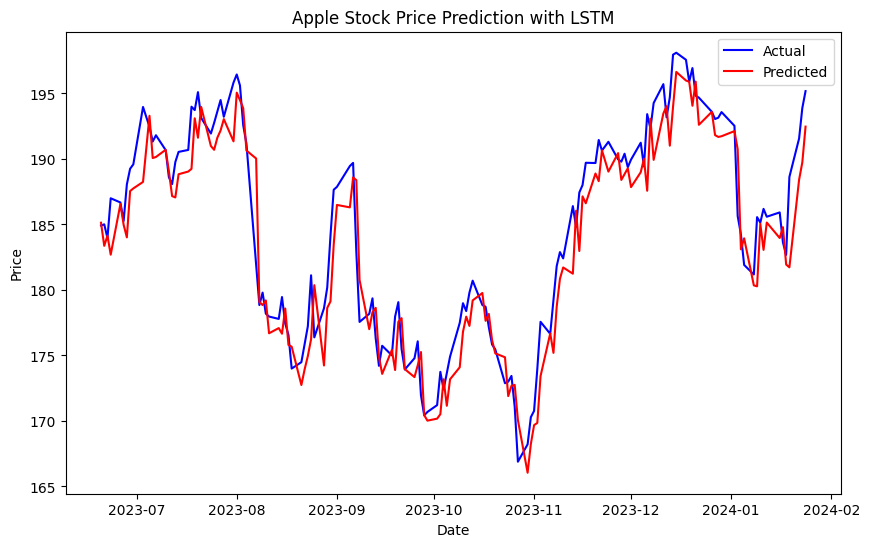

In [96]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual')
plt.plot(data.index[-len(test_predict):], test_predict, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()